# Eye of the Emergency

## Libraries and dataset import

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sadio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sadio\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
train_df = pd.read_csv('train_tweets.csv')
test_df = pd.read_csv('test_tweets.csv')

## Data Exploration

### TRAIN

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
train_df.text.size

7613

In [7]:
train_df.text.unique().size

7503

In [8]:
train_df_unique = pd.DataFrame(train_df.text.unique(), columns=['text'])
train_df_unique

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
...,...
7498,#WorldNews Fallen powerlines on G:link tram: U...
7499,on the flip side I'm at Walmart and there is a...
7500,Suicide bomber kills 15 in Saudi security site...
7501,Two giant cranes holding a bridge collapse int...


In [9]:
unique_count = pd.DataFrame(pd.value_counts(train_df.text))
unique_count

,text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives,5
...,...
Escape The Heat (and the #ORShow) for a trail run on Desolation Loop you'll be glad you did http://t.co/n2ucNzh38P http://t.co/VU8fWYMw5r,1
Hey girl you must be Toe Hobbit: Part Two: ghe Desolation of Smaug because I'm not interested in seeing you. Sorry.,1
Emotional Desolation the effect of alcoholism/addiction on family - http://t.co/31tGtLz3YA Forgiving is hard http://t.co/C7rcO2eMwF,1
Fotoset: elanorofrohan: 10th December 2013 Green Carpet in Zurich for the Swiss Premiere of The Desolation... http://t.co/BQ3P7n7w06,1


In [10]:
unique_count = unique_count.reset_index()
unique_count.columns = ['text', 'count']
unique_count

,text,count
0,11-Year-Old Boy Charged With Manslaughter of T...,10
1,He came to a land which was engulfed in tribal...,6
2,The Prophet (peace be upon him) said 'Save you...,6
3,#Bestnaijamade: 16yr old PKK suicide bomber wh...,6
4,Madhya Pradesh Train Derailment: Village Youth...,5
...,...,...
7498,Escape The Heat (and the #ORShow) for a trail ...,1
7499,Hey girl you must be Toe Hobbit: Part Two: ghe...,1
7500,Emotional Desolation the effect of alcoholism/...,1
7501,Fotoset: elanorofrohan: 10th December 2013 Gre...,1


In [11]:
#train_df[train_df.text == unique_count.iloc[0].text]

In [12]:
train_df_unique = train_df_unique.merge(unique_count)
train_df_unique

,text,count
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7498,#WorldNews Fallen powerlines on G:link tram: U...,1
7499,on the flip side I'm at Walmart and there is a...,1
7500,Suicide bomber kills 15 in Saudi security site...,1
7501,Two giant cranes holding a bridge collapse int...,1


In [13]:
train_df_count = train_df.merge(unique_count)
train_df_count

,id,keyword,location,text,target,count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1
...,...,...,...,...,...,...
7608,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,1
7609,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,1
7610,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,1
7611,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,1


In [14]:
train_df_count['count'].sum()

8021

In [15]:
slicr = [train_df_count[train_df_count.text == train_df_count.iloc[i].text].shape[0] for i in range(train_df_count.shape[0])]

In [16]:
#slicr

In [17]:
len(slicr)

7613

In [18]:
sum(slicr)

8021

In [19]:
lg = pd.DataFrame([len(txt) for txt in train_df.text], columns = ['len_text'])
lg

,len_text
0,69
1,38
2,133
3,65
4,88
...,...
7608,83
7609,125
7610,65
7611,137


In [20]:
train_df_len = pd.concat([train_df_count, lg], axis = 1)
train_df_len.head()

,id,keyword,location,text,target,count,len_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1,88


In [21]:
df = train_df_len

In [22]:
round(df.len_text.mean(), 1)

101.0

In [23]:
round(df[df.target == 0].len_text.mean(), 1)

97.6

In [24]:
round(df[df.target == 1].len_text.mean(), 1)

105.6

### TEST

In [25]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [27]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## Data Preprocess

In [28]:
df.location

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: location, Length: 7613, dtype: object

In [29]:
#[int(type(ct)==str) for ct in df.location]

In [30]:
encode_location = pd.DataFrame([int(type(ct)==str) for ct in df.location], columns=['location_enc'])

In [31]:
df = pd.concat([df, encode_location], axis=1)
df

,id,keyword,location,text,target,count,len_text,location_enc
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,69,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1,38,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1,133,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,65,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1,88,0
...,...,...,...,...,...,...,...,...
7608,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,1,83,0
7609,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,1,125,0
7610,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,1,65,0
7611,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,1,137,0


## Data Visualization

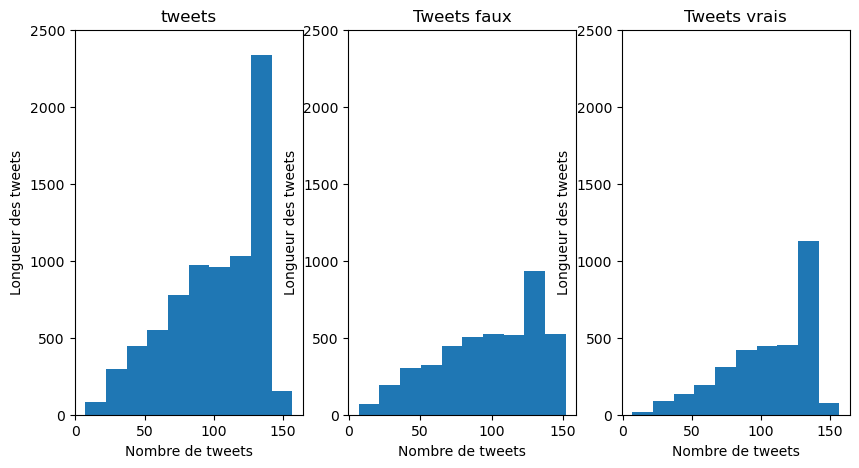

In [32]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)

plt.hist(df.len_text)
plt.title('tweets')
plt.xlabel('Nombre de tweets')
plt.ylabel('Longueur des tweets')
plt.ylim((0,2500))

plt.subplot(1, 3, 2)

plt.hist(df[df.target==0].len_text)
plt.title('Tweets faux')
plt.xlabel('Nombre de tweets')
plt.ylabel('Longueur des tweets')
plt.ylim((0,2500))


plt.subplot(1, 3, 3)

plt.hist(df[df.target==1].len_text)
plt.title('Tweets vrais')
plt.xlabel('Nombre de tweets')
plt.ylabel('Longueur des tweets')
plt.ylim((0,2500))

plt.show()

In [33]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f} %\n({v:d})'.format(p=pct,v=val)
    return my_autopct

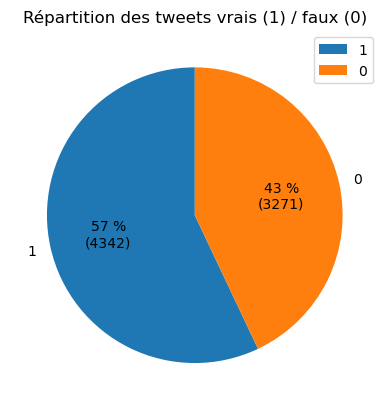

In [34]:
plt.pie(pd.value_counts(df.target), labels = df.target.unique(), autopct=make_autopct(pd.value_counts(df.target)), startangle = 90)

plt.title('Répartition des tweets vrais (1) / faux (0)')
plt.legend()

plt.show()

####  Construisez votre propre pipeline de traitement de texte 

In [35]:
df = train_df_len.copy()

In [64]:
df2= train_df_len.copy()

##### Tokenization

In [36]:
#df['text_tokens'] = df['text'].apply(lambda x: word_tokenize(x))


In [51]:
#df.head()

#### Suppression des stops words

In [38]:
#stop_words = set(stopwords.words('english'))

In [52]:
df['text_tokens'] = df['text_tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
#df.head()

In [40]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
#df['text_tokens'] = df['text_tokens'].apply(lambda x: [word for word in x if word not in string.punctuation])

In [43]:
#lemmatizer = WordNetLemmatizer()


In [45]:
#df['text_tokens'] = df['text_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [49]:
#[list for list in df.text_tokens]

In [53]:
#df

In [78]:
# text cleaning


def text_processing(text):
     #Charger les stop-words en anglais
    stop_words = set(stopwords.words('english'))

    # Initialiser le lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Appliquer la tokenisation à tous les textes
    tokens = word_tokenize(text.lower())

    # Supprimer les ponctuations
    tokens = [word for word in tokens if word not in string.punctuation]
    

    # Supprimer les stop-words
    tokens = [word for word in tokens if word not in stop_words]
    

    # Appliquer la lemmatisation à tous les tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    tokens = ' '.join(tokens)
    return tokens
    

# Charger l'ensemble de données
#df = pd.read_csv('votre_fichier.csv')



In [79]:
# Appliquer la fonction Cleanup à tous les textes dans la colonne "text"
df2['text_process'] = df['text'].apply(text_processing)

In [80]:
df2.head()

,id,keyword,location,text,target,count,len_text,text_process
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,1,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,1,133,resident asked 'shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,1,65,"13,000 people receive wildfire evacuation orde..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,1,88,got sent photo ruby alaska smoke wildfire pour...


In [81]:
df2.text_process[0]

'deed reason earthquake may allah forgive u'

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df2['text_process'], df2['target'], test_size=0.2, random_state=42)


In [85]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [86]:
X_train_vec

<6090x17514 sparse matrix of type '<class 'numpy.int64'>'
	with 65731 stored elements in Compressed Sparse Row format>